# GRUPO ZAP: DATA SCIENCE CHALLENGE

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zap_helpers as zap

RAW_PATH   = '../data-raw/'
DATA_PATH  = '../data-sample/'

GET_PARSE_SAVE_DATA = False

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [2]:
if GET_PARSE_SAVE_DATA:  
    # GET
    base_url  = 'https://s3.amazonaws.com/grupozap-data-challenge/data/'
    url_train = base_url + 'source-4-ds-train.json.zip'
    url_test  = base_url + 'source-4-ds-test.json.zip'

    zap.download_json(url_train, RAW_PATH, 'train')
    zap.download_json(url_test, RAW_PATH, 'test')
    
    # PARSE
    json_train = RAW_PATH + 'train.json'
    json_test  = RAW_PATH + 'test.json'

    df_train = zap.parse_json(json_train)
    df_test  = zap.parse_json(json_test)
    
    # SAVE
    train_data = DATA_PATH + 'train.pkl'
    test_data  = DATA_PATH + 'test.pkl'
    
    zap.pkl_io(train_data, method='dump', file=df_train)
    zap.pkl_io(test_data, method='dump', file=df_test)

In [3]:
train_data = DATA_PATH + 'train.pkl'
test_data  = DATA_PATH + 'test.pkl'

df_train = zap.pkl_io(train_data)
df_test  = zap.pkl_io(test_data)

# ANÁLISE EXPLORATÓRIA

#### Começaremos explorando uma amostra dos dados e seus tipos, para avaliar se a conversão JSON -> DataFrame está correta.

In [4]:
df_train.head()

,address_city,address_country,address_district,address_geoLocation_location_lat,address_geoLocation_location_lon,address_geoLocation_precision,address_locationId,address_neighborhood,address_state,address_street,address_streetNumber,address_unitNumber,address_zipCode,address_zone,bathrooms,bedrooms,createdAt,description,id,images,listingStatus,owner,parkingSpaces,pricingInfos_businessType,pricingInfos_price,publicationType,publisherId,suites,title,totalAreas,unitTypes,updatedAt,usableAreas,pricingInfos_monthlyCondoFee,pricingInfos_period,pricingInfos_rentalTotalPrice,pricingInfos_yearlyIptu
0,São Paulo,BR,,-23.612923,-46.614222,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim da...,Jardim da Saúde,São Paulo,Rua Juvenal Galeno,53,,04290030,Zona Sul,3,4,2017-02-07T13:21:40Z,"04 dorms sendo 01 suíte e closet, sala de esta...",787c7bd19d,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,6,SALE,700000,STANDARD,f4603b2b52,1,PRÓXIMO A AVENIDA PRESIDENTE TANCREDO NEVES,388,TWO_STORY_HOUSE,2018-12-06T19:27:12.623Z,388,NaN,NaN,NaN,NaN
1,São Paulo,BR,,-23.643962,-46.593475,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Liviero,Vila Santa Teresa (Zona Sul),São Paulo,Rua Juruaba,16,,04187320,Zona Sul,2,3,2016-03-21T18:35:17Z,"03 dorms sendo 01 suíte, sala, sala de jantar,...",4d68c0cdbe,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,2,SALE,336000,STANDARD,f4603b2b52,1,PRÓXIMO A FACULDADE UNIP CAMPUS ANCHIETA,129,HOME,2018-12-12T13:17:23.547Z,129,NaN,NaN,NaN,NaN
2,São Paulo,,,-23.568559,-46.647452,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Cerqueira C...,Bela Vista,São Paulo,Avenida Paulista,402,,01311000,,4,0,2018-12-18T23:47:03.425Z,"Andar com 395,70m² de área útil, 04 wcs, 05 va...",e7e0b554ac,[http://static.nidoimovel.com.br/d3d9446802a44...,ACTIVE,False,5,RENTAL,24929,STANDARD,501f6d5e94,0,Excelente Conjunto Comercial na Av. Paulista,None,COMMERCIAL_PROPERTY,NaN,396,4900.0,MONTHLY,29829.0,4040.0
3,São Paulo,,,-23.598023,-46.682781,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Olimpia,Vila Olímpia,São Paulo,Rua Alvorada,1190,,04550004,,2,3,2018-10-26T16:18:28.915Z,"Viva melhor e de um jeito novo, com privilégio...",6654d93423,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,2,SALE,739643,STANDARD,527c7b0cc0,1,"Apartamento com 80m², 2 vagas próximo ao Parqu...",80,APARTMENT,2018-11-08T16:38:35.434Z,80,686.0,NaN,NaN,1610.0
4,São Paulo,,,-23.582497,-46.653027,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Paraiso,Paraíso,São Paulo,Rua Curitiba,380,,04005030,,5,4,2018-12-14T18:06:51.342Z,Sua área é ocupada majoritariamente por instit...,9ffaf676ae,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,5,SALE,7520099,STANDARD,527c7b0cc0,4,"Apartamento 332m², 4 suítes à venda próximo ao...",332,APARTMENT,2018-12-14T18:06:55.140Z,3322,6230.0,NaN,NaN,18900.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133964 entries, 0 to 133963
Data columns (total 37 columns):
address_city                        133964 non-null object
address_country                     133964 non-null object
address_district                    133964 non-null object
address_geoLocation_location_lat    133953 non-null float64
address_geoLocation_location_lon    133953 non-null float64
address_geoLocation_precision       133953 non-null object
address_locationId                  133964 non-null object
address_neighborhood                133964 non-null object
address_state                       133964 non-null object
address_street                      133964 non-null object
address_streetNumber                133964 non-null object
address_unitNumber                  133964 non-null object
address_zipCode                     133964 non-null object
address_zone                        133964 non-null object
bathrooms                           133051 non-null object
be

#### Removeremos as colunas:
 - *images*, composta por listas com URLs para imagens do imóvel. Não trabalharemos com imagem nesse modelo.
 - *description* e *title*, por serem textuais e necessitarem de processamento de linguagem natural para poderem ser usadas como features.

In [6]:
cols_to_remove = ['images', 'description', 'title']
df_train.drop(axis=1, columns=cols_to_remove, inplace=True)

#### Algumas colunas que deveriam ser numéricas foram lidas como **object**. Isso indica inconsistência nos dados. Um exemplo é a variável **address_unitNumber**. Esperamos que indique o número do apartamento, quando aplicável, mas o preenchimento dos dados é o seguinte:

In [7]:
df_train.address_unitNumber.value_counts()

                                      133933
Apartamento                                4
191                                        1
00                                         1
Edifício Itaici                            1
Sala 22                                    1
02                                         1
CASA                                       1
Ville Bayard                               1
Condomínio                                 1
451                                        1
APTO                                       1
21                                         1
APARTAMENTO                                1
PRÓXIMO AO METRÔ CAMPO LIMPO               1
APTO 81                                    1
1140                                       1
Quatro Estações                            1
Edifício Bluemont                          1
Dona Norma                                 1
C                                          1
Campos Eliseos                             1
Well Pompé

#### Além da quase totalidade dos dados serem nulos, o preenchimento dos não-nulos é incorreto. Vamos tratar esse e demais casos a seguir.

In [8]:
cols_to_numeric = ['address_streetNumber', 'address_unitNumber', 'bathrooms', 'bedrooms', 'parkingSpaces', 'suites', 'totalAreas', 'usableAreas']

df_train.loc[:, cols_to_numeric] = df_train.loc[:, cols_to_numeric].applymap(zap.convert_to_num)

#### Verificando os dados após a conversão:

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133964 entries, 0 to 133963
Data columns (total 34 columns):
address_city                        133964 non-null object
address_country                     133964 non-null object
address_district                    133964 non-null object
address_geoLocation_location_lat    133953 non-null float64
address_geoLocation_location_lon    133953 non-null float64
address_geoLocation_precision       133953 non-null object
address_locationId                  133964 non-null object
address_neighborhood                133964 non-null object
address_state                       133964 non-null object
address_street                      133964 non-null object
address_streetNumber                89637 non-null float64
address_unitNumber                  7 non-null float64
address_zipCode                     133964 non-null object
address_zone                        133964 non-null object
bathrooms                           133051 non-null float64
bedro

#### Vamos analisar as variáveis categóricas.

In [10]:
distinct_count = df_train.select_dtypes(include=['object']).apply(lambda x: x.value_counts().shape[0])
print(distinct_count)

address_city                          1
address_country                       2
address_district                      3
address_geoLocation_precision         5
address_locationId                 1185
address_neighborhood               1634
address_state                         4
address_street                    12933
address_zipCode                   15925
address_zone                          6
createdAt                        132239
id                               133964
listingStatus                         1
pricingInfos_businessType             2
publicationType                       2
publisherId                        3533
unitTypes                            19
updatedAt                        112004
pricingInfos_period                   3
dtype: int64


#### Algumas possuem poucos valores distintos. Vamos detalhar esses casos.

In [11]:
df_train.loc[:, list(distinct_count[distinct_count <= 6].index)].apply(lambda x: x.value_counts(dropna=False)).T.stack()

address_city                   São Paulo             133964.0
address_country                                      120112.0
                               BR                     13852.0
address_district                                     133951.0
                               Jaraguá                   11.0
                               Jaçanã                     2.0
address_geoLocation_precision  APPROXIMATE             7090.0
                               GEOMETRIC_CENTER       37623.0
                               NO_GEOCODE                30.0
                               RANGE_INTERPOLATED     14137.0
                               ROOFTOP                75073.0
                               NaN                       11.0
address_state                                             3.0
                               São Paulo             133714.0
                               SP                       246.0
                               Santa Catarina             1.0
address_

#### Podemos ver que todas as observações dessa amostra são de imóveis em São Paulo. Consequentemente, podemos excluir as colunas *address_city*, *addres_state* e *address_country*. A variável *listingStatus* pode sair da análise por ser constante. *address_district* será excluída por ser praticamente toda composta por valores nulos.

In [12]:
categorical_to_remove = ['address_city', 'address_state', 'address_country', 'address_district', 'listingStatus']
df_train.drop(axis=1, columns=categorical_to_remove, inplace=True)

cols_to_remove += categorical_to_remove

#### Armazenaremos `id` e `address_neighborhood` (removida da análise por ter alta cardinalidade) em variáveis distintas, pois serão usadas para análises futuras

In [13]:
id_col       = 'id'
neighbor_col = 'address_neighborhood'

id_train       = df_train.loc[:, id_col].values
neighbor_train = df_train.loc[:, neighbor_col].values

df_train.drop(axis=1, columns=[id_col, neighbor_col], inplace=True)

#### Vamos ver o panorama dos dados até o momento

In [14]:
df_train.head()

,address_geoLocation_location_lat,address_geoLocation_location_lon,address_geoLocation_precision,address_locationId,address_street,address_streetNumber,address_unitNumber,address_zipCode,address_zone,bathrooms,bedrooms,createdAt,owner,parkingSpaces,pricingInfos_businessType,pricingInfos_price,publicationType,publisherId,suites,totalAreas,unitTypes,updatedAt,usableAreas,pricingInfos_monthlyCondoFee,pricingInfos_period,pricingInfos_rentalTotalPrice,pricingInfos_yearlyIptu
0,-23.612923,-46.614222,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim da...,Rua Juvenal Galeno,53.0,NaN,04290030,Zona Sul,3.0,4.0,2017-02-07T13:21:40Z,False,6.0,SALE,700000,STANDARD,f4603b2b52,1.0,388.0,TWO_STORY_HOUSE,2018-12-06T19:27:12.623Z,388.0,NaN,NaN,NaN,NaN
1,-23.643962,-46.593475,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Liviero,Rua Juruaba,16.0,NaN,04187320,Zona Sul,2.0,3.0,2016-03-21T18:35:17Z,False,2.0,SALE,336000,STANDARD,f4603b2b52,1.0,129.0,HOME,2018-12-12T13:17:23.547Z,129.0,NaN,NaN,NaN,NaN
2,-23.568559,-46.647452,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Cerqueira C...,Avenida Paulista,402.0,NaN,01311000,,4.0,0.0,2018-12-18T23:47:03.425Z,False,5.0,RENTAL,24929,STANDARD,501f6d5e94,0.0,NaN,COMMERCIAL_PROPERTY,NaN,396.0,4900.0,MONTHLY,29829.0,4040.0
3,-23.598023,-46.682781,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Olimpia,Rua Alvorada,1190.0,NaN,04550004,,2.0,3.0,2018-10-26T16:18:28.915Z,False,2.0,SALE,739643,STANDARD,527c7b0cc0,1.0,80.0,APARTMENT,2018-11-08T16:38:35.434Z,80.0,686.0,NaN,NaN,1610.0
4,-23.582497,-46.653027,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Paraiso,Rua Curitiba,380.0,NaN,04005030,,5.0,4.0,2018-12-14T18:06:51.342Z,False,5.0,SALE,7520099,STANDARD,527c7b0cc0,4.0,332.0,APARTMENT,2018-12-14T18:06:55.140Z,3322.0,6230.0,NaN,NaN,18900.0


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133964 entries, 0 to 133963
Data columns (total 27 columns):
address_geoLocation_location_lat    133953 non-null float64
address_geoLocation_location_lon    133953 non-null float64
address_geoLocation_precision       133953 non-null object
address_locationId                  133964 non-null object
address_street                      133964 non-null object
address_streetNumber                89637 non-null float64
address_unitNumber                  7 non-null float64
address_zipCode                     133964 non-null object
address_zone                        133964 non-null object
bathrooms                           133051 non-null float64
bedrooms                            130945 non-null float64
createdAt                           133964 non-null object
owner                               133964 non-null bool
parkingSpaces                       129539 non-null float64
pricingInfos_businessType           133964 non-null object
prici

In [16]:
distinct_count = df_train.select_dtypes(include=['object']).apply(lambda x: x.value_counts().shape[0])
print(distinct_count)

address_geoLocation_precision         5
address_locationId                 1185
address_street                    12933
address_zipCode                   15925
address_zone                          6
createdAt                        132239
pricingInfos_businessType             2
publicationType                       2
publisherId                        3533
unitTypes                            19
updatedAt                        112004
pricingInfos_period                   3
dtype: int64


#### Mais variáveis a serem removidas:
 - *address_unitNumber* por ter apenas 7 valores não-nulos
 - *address_locationId*, *address_street*, *address_zipCode*, *address_streetNumber* e *address_zone* por terem alta cardinalidade / informações de localização já estarem representadas por latitude e longitude
 - *address_geoLocation_precision* por ser apenas uma informação da precisão da latitude / longitude
 - *publisherId* pela alta cardinalidade

#### Variáveis com alta cardinalidade precisam de um tratamento especial para serem usadas como input para o modelo. Técnicas de encoding tradicionais, como o **One Hot Encoding**, não funcionam nesses casos pois acabam gerando milhares de colunas one-hot com alto grau de esparsidade, tornando o treino do modelo muito custoso computacionalmente e difícil de convergir. A técnica ideal é a **Categorical Embedding**, usando redes neurais para aprender a representar as categorias usando vetores numéricos densos de baixa dimensionalidade. Essa técnica também demanda tempo e poder de processamento, estando fora do escopo desse projeto.

In [17]:
cols_to_drop = ['address_unitNumber', 'address_locationId', 'address_street', 'address_zipCode', 'address_streetNumber', 'address_zone', 'address_geoLocation_precision', 'publisherId']
df_train.drop(axis=1, columns=cols_to_drop, inplace=True)

cols_to_remove += cols_to_drop

#### Vamos olhar com mais detalhe as variáveis restantes.

In [18]:
df_train.describe(include='all')

,address_geoLocation_location_lat,address_geoLocation_location_lon,bathrooms,bedrooms,createdAt,owner,parkingSpaces,pricingInfos_businessType,pricingInfos_price,publicationType,suites,totalAreas,unitTypes,updatedAt,usableAreas,pricingInfos_monthlyCondoFee,pricingInfos_period,pricingInfos_rentalTotalPrice,pricingInfos_yearlyIptu
count,133953.000000,133953.000000,133051.000000,130945.000000,133964,133964,129539.000000,133964,1.339640e+05,133964,120347.000000,9.113200e+04,133964,127367,1.332110e+05,1.171270e+05,29051,2.871400e+04,1.146120e+05
unique,NaN,NaN,NaN,NaN,132239,2,NaN,2,NaN,2,NaN,NaN,19,112004,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,2017-06-27T13:04:43Z,False,NaN,SALE,NaN,STANDARD,NaN,NaN,APARTMENT,2018-11-08T15:48:48.424Z,NaN,NaN,MONTHLY,NaN,NaN
freq,NaN,NaN,NaN,NaN,9,133926,NaN,105332,NaN,131595,NaN,NaN,72241,374,NaN,NaN,29029,NaN,NaN
mean,-23.554263,-46.643395,2.375683,2.327023,NaN,NaN,2.443187,NaN,6.637484e+05,NaN,1.106534,1.327059e+04,NaN,NaN,2.204832e+02,1.507679e+03,NaN,1.102183e+04,4.182520e+03
std,0.165147,0.318494,2.146044,2.140123,NaN,NaN,5.251624,NaN,1.317732e+06,NaN,1.218938,3.682658e+06,NaN,NaN,5.713502e+03,7.795406e+04,NaN,7.701223e+04,8.501091e+05
min,-23.848153,-46.820973,0.000000,0.000000,NaN,NaN,0.000000,NaN,7.000000e+01,NaN,0.000000,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,-23.594475,-46.684151,1.000000,2.000000,NaN,NaN,1.000000,NaN,1.750000e+05,NaN,0.000000,6.000000e+01,NaN,NaN,6.000000e+01,0.000000e+00,NaN,2.310000e+03,0.000000e+00
50%,-23.558990,-46.654071,2.000000,2.000000,NaN,NaN,2.000000,NaN,3.710000e+05,NaN,1.000000,1.200000e+02,NaN,NaN,1.050000e+02,3.990000e+02,NaN,4.111500e+03,8.400000e+01
75%,-23.527634,-46.607885,3.000000,3.000000,NaN,NaN,3.000000,NaN,7.000000e+05,NaN,2.000000,2.500000e+02,NaN,NaN,2.000000e+02,8.610000e+02,NaN,9.100000e+03,3.640000e+02


#### Latitude e Longitude têm valores iguais a 0, quando deveriam variar bem próximo às suas respectivas médias.

In [19]:
df_train[df_train.address_geoLocation_location_lat == 0]

,address_geoLocation_location_lat,address_geoLocation_location_lon,bathrooms,bedrooms,createdAt,owner,parkingSpaces,pricingInfos_businessType,pricingInfos_price,publicationType,suites,totalAreas,unitTypes,updatedAt,usableAreas,pricingInfos_monthlyCondoFee,pricingInfos_period,pricingInfos_rentalTotalPrice,pricingInfos_yearlyIptu
4562,0.0,0.0,1.0,2.0,2016-02-25T17:58:46Z,False,3.0,SALE,276500,STANDARD,0.0,90.0,HOME,2018-11-29T16:40:38.708Z,90.0,NaN,NaN,NaN,NaN
9787,0.0,0.0,1.0,2.0,2014-10-28T16:19:45Z,False,3.0,SALE,266000,STANDARD,0.0,80.0,TWO_STORY_HOUSE,2018-11-29T16:47:43.835Z,80.0,NaN,NaN,NaN,NaN
9837,0.0,0.0,2.0,3.0,2014-12-15T13:42:31Z,False,2.0,SALE,301000,STANDARD,0.0,100.0,TWO_STORY_HOUSE,2018-11-29T16:46:30.658Z,100.0,NaN,NaN,NaN,NaN
10100,0.0,0.0,1.0,3.0,2014-11-26T17:14:20Z,False,1.0,RENTAL,2100,STANDARD,1.0,90.0,APARTMENT,2018-11-29T16:46:53.886Z,90.0,NaN,MONTHLY,2100.0,NaN
10269,0.0,0.0,2.0,3.0,2014-10-24T15:54:35Z,False,1.0,SALE,343000,STANDARD,1.0,292.0,HOME,2018-11-29T16:47:51.239Z,292.0,NaN,NaN,NaN,NaN
14954,0.0,0.0,3.0,2.0,2016-04-19T13:55:42Z,False,4.0,RENTAL,6160,STANDARD,2.0,242.0,APARTMENT,2018-11-08T13:04:03.023Z,242.0,2100.0,MONTHLY,8260.0,10500.0


In [20]:
df_train[df_train.address_geoLocation_location_lon == 0]

,address_geoLocation_location_lat,address_geoLocation_location_lon,bathrooms,bedrooms,createdAt,owner,parkingSpaces,pricingInfos_businessType,pricingInfos_price,publicationType,suites,totalAreas,unitTypes,updatedAt,usableAreas,pricingInfos_monthlyCondoFee,pricingInfos_period,pricingInfos_rentalTotalPrice,pricingInfos_yearlyIptu
4562,0.0,0.0,1.0,2.0,2016-02-25T17:58:46Z,False,3.0,SALE,276500,STANDARD,0.0,90.0,HOME,2018-11-29T16:40:38.708Z,90.0,NaN,NaN,NaN,NaN
9787,0.0,0.0,1.0,2.0,2014-10-28T16:19:45Z,False,3.0,SALE,266000,STANDARD,0.0,80.0,TWO_STORY_HOUSE,2018-11-29T16:47:43.835Z,80.0,NaN,NaN,NaN,NaN
9837,0.0,0.0,2.0,3.0,2014-12-15T13:42:31Z,False,2.0,SALE,301000,STANDARD,0.0,100.0,TWO_STORY_HOUSE,2018-11-29T16:46:30.658Z,100.0,NaN,NaN,NaN,NaN
10100,0.0,0.0,1.0,3.0,2014-11-26T17:14:20Z,False,1.0,RENTAL,2100,STANDARD,1.0,90.0,APARTMENT,2018-11-29T16:46:53.886Z,90.0,NaN,MONTHLY,2100.0,NaN
10269,0.0,0.0,2.0,3.0,2014-10-24T15:54:35Z,False,1.0,SALE,343000,STANDARD,1.0,292.0,HOME,2018-11-29T16:47:51.239Z,292.0,NaN,NaN,NaN,NaN
14954,0.0,0.0,3.0,2.0,2016-04-19T13:55:42Z,False,4.0,RENTAL,6160,STANDARD,2.0,242.0,APARTMENT,2018-11-08T13:04:03.023Z,242.0,2100.0,MONTHLY,8260.0,10500.0


#### Como são poucos casos, manteremos as observações na base. Faremos a mesma verificação para *bathrooms*, *bedrooms*, *parkingSpaces*, *suites*, *usableAreas* e *totalAreas* que aprensentam valores extremamente altos.
#### Começando por imóveis com mais de 10 banheiros:

In [21]:
df_train[df_train.bathrooms > 10].unitTypes.value_counts()

COMMERCIAL_PROPERTY           178
OFFICE                         63
SHED_DEPOSIT_WAREHOUSE         22
TWO_STORY_HOUSE                21
APARTMENT                      18
HOME                           10
BUSINESS                        9
CONDOMINIUM                     7
COMMERCIAL_BUILDING             6
PENTHOUSE                       3
STORE                           2
RESIDENTIAL_ALLOTMENT_LAND      1
RESIDENTIAL_BUILDING            1
Name: unitTypes, dtype: int64

#### Propriedades com mais de 10 banheiros são comerciais, escritórios e depósitos, em sua maioria. Os valores são condizentes.
#### E com mais de 7 quartos?

In [22]:
df_train[df_train.bedrooms > 7].unitTypes.value_counts()

COMMERCIAL_PROPERTY           65
TWO_STORY_HOUSE               55
HOME                          39
OFFICE                        33
BUSINESS                      13
APARTMENT                     12
PENTHOUSE                      6
SHED_DEPOSIT_WAREHOUSE         5
COMMERCIAL_BUILDING            4
RESIDENTIAL_BUILDING           3
RESIDENTIAL_ALLOTMENT_LAND     3
STORE                          2
CONDOMINIUM                    2
COMMERCIAL_ALLOTMENT_LAND      2
CLINIC                         1
Name: unitTypes, dtype: int64

#### A mesma tendência se verifica. Não há base para eliminar esses valores como sendo inválidos.
#### Veremos as variáveis restantes: parkingSpaces, suites, usableAreas e totalAreas

#### Mais do que 10 vagas de garagem:

In [23]:
df_train[df_train.parkingSpaces > 10].unitTypes.value_counts()

COMMERCIAL_PROPERTY           704
OFFICE                        642
SHED_DEPOSIT_WAREHOUSE        190
TWO_STORY_HOUSE               104
HOME                           88
STORE                          41
BUSINESS                       33
APARTMENT                      29
COMMERCIAL_BUILDING            17
CONDOMINIUM                    13
COMMERCIAL_ALLOTMENT_LAND       7
RESIDENTIAL_ALLOTMENT_LAND      5
FLAT                            4
PENTHOUSE                       4
RESIDENTIAL_BUILDING            3
COUNTRY_HOUSE                   2
CLINIC                          1
Name: unitTypes, dtype: int64

#### Mais de 7 suítes:

In [24]:
df_train[df_train.suites > 7].unitTypes.value_counts()

COMMERCIAL_PROPERTY           8
TWO_STORY_HOUSE               6
HOME                          6
APARTMENT                     5
OFFICE                        4
PENTHOUSE                     3
BUSINESS                      2
FLAT                          1
RESIDENTIAL_ALLOTMENT_LAND    1
SHED_DEPOSIT_WAREHOUSE        1
Name: unitTypes, dtype: int64

#### Área útil e área total maiores do que 80% do maior valor encontrado na base:

In [25]:
df_train[df_train.usableAreas > (max(df_train.usableAreas) * 0.8)].unitTypes.value_counts()

RESIDENTIAL_ALLOTMENT_LAND    1
Name: unitTypes, dtype: int64

In [26]:
df_train[df_train.totalAreas > (max(df_train.totalAreas) * 0.8)].unitTypes.value_counts()

APARTMENT    1
Name: unitTypes, dtype: int64

#### Os dois casos estão absurdamente acima da média da base. Prováveis erros de input.

In [27]:
df_train[df_train.usableAreas > (max(df_train.usableAreas) * 0.8)]

,address_geoLocation_location_lat,address_geoLocation_location_lon,bathrooms,bedrooms,createdAt,owner,parkingSpaces,pricingInfos_businessType,pricingInfos_price,publicationType,suites,totalAreas,unitTypes,updatedAt,usableAreas,pricingInfos_monthlyCondoFee,pricingInfos_period,pricingInfos_rentalTotalPrice,pricingInfos_yearlyIptu
116402,-23.482426,-46.636374,0.0,0.0,2013-09-30T16:10:41Z,False,0.0,SALE,1750000,STANDARD,0.0,2025000.0,RESIDENTIAL_ALLOTMENT_LAND,2018-09-15T13:10:29.110Z,2025000.0,0.0,NaN,NaN,0.0


#### No caso acima, trata-se de um terreno para loteamento. O valor, apesar de alto, faz sentido.
#### Vamos ver o caso do apartamento:

In [28]:
df_train[df_train.totalAreas > (max(df_train.totalAreas) * 0.8)]

,address_geoLocation_location_lat,address_geoLocation_location_lon,bathrooms,bedrooms,createdAt,owner,parkingSpaces,pricingInfos_businessType,pricingInfos_price,publicationType,suites,totalAreas,unitTypes,updatedAt,usableAreas,pricingInfos_monthlyCondoFee,pricingInfos_period,pricingInfos_rentalTotalPrice,pricingInfos_yearlyIptu
107792,-23.544001,-46.551719,3.0,3.0,2018-07-06T05:06:59.474Z,False,4.0,SALE,1505000,STANDARD,3.0,1.111111e+09,APARTMENT,2019-02-25T04:44:44.886Z,225.0,665.0,NaN,NaN,630.0


#### Esse certamente é erro de digitação. Podemos usar o valor de *usableAreas* nesse caso para corrigir.

In [29]:
df_train.loc[df_train.totalAreas > (max(df_train.totalAreas) * 0.8), 'totalAreas'] = df_train.usableAreas[df_train.totalAreas > (max(df_train.totalAreas) * 0.8)]

#### Temos duas variáveis de data: *createdAt* e *updatedAt*. Podemos extrair a informação de quanto tempo o anúncio está no ar, pode haver alguma correlação com o preço.

In [30]:
df_train['publicationAge'] = (pd.to_datetime(df_train.updatedAt, errors='coerce').dt.date - pd.to_datetime(df_train.createdAt, errors='coerce').dt.date).dt.days

#### Podemos excluir as variáveis de data da análise.

In [31]:
cols_to_drop = ['createdAt', 'updatedAt']
df_train.drop(axis=1, columns=cols_to_drop, inplace=True)

cols_to_remove += cols_to_drop

#### Status dos dados após as remoções:

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133964 entries, 0 to 133963
Data columns (total 18 columns):
address_geoLocation_location_lat    133953 non-null float64
address_geoLocation_location_lon    133953 non-null float64
bathrooms                           133051 non-null float64
bedrooms                            130945 non-null float64
owner                               133964 non-null bool
parkingSpaces                       129539 non-null float64
pricingInfos_businessType           133964 non-null object
pricingInfos_price                  133964 non-null int64
publicationType                     133964 non-null object
suites                              120347 non-null float64
totalAreas                          91132 non-null float64
unitTypes                           133964 non-null object
usableAreas                         133211 non-null float64
pricingInfos_monthlyCondoFee        117127 non-null float64
pricingInfos_period                 29051 non-null object


#### Vamos converter as colunas com tipo **object** para category, remover variáveis com muitos missings e prosseguir com as análises.

In [33]:
cols_to_category = list(df_train.select_dtypes(include=['object']).columns)
df_train[cols_to_category] = df_train[cols_to_category].apply(lambda x: x.astype('category'))

In [34]:
missing_cols = ['totalAreas', 'pricingInfos_period', 'pricingInfos_rentalTotalPrice']
df_train.drop(axis=1, columns=missing_cols, inplace=True)

In [35]:
cols_to_remove += missing_cols

## Correlação

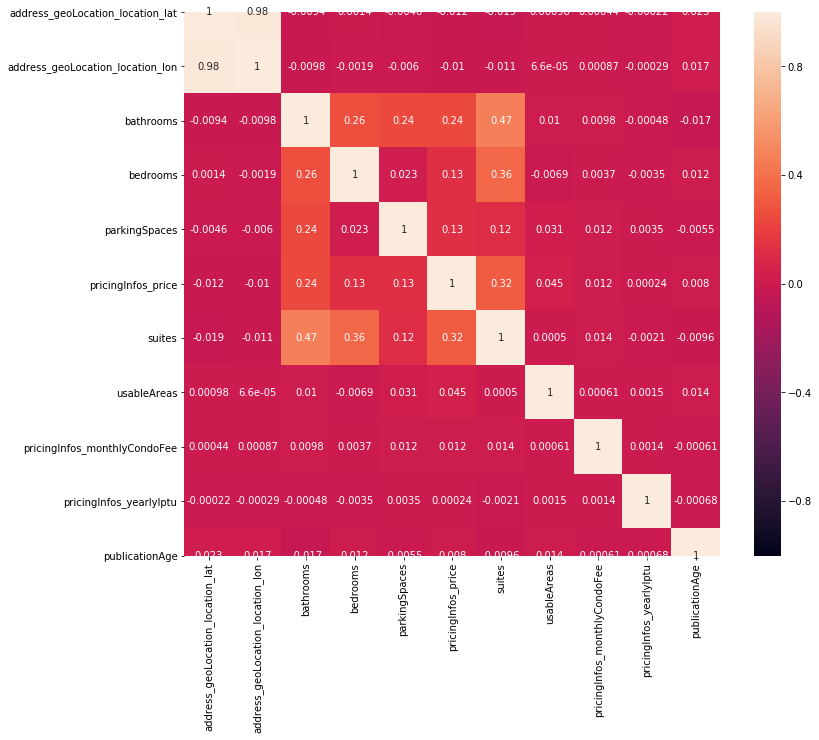

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.select_dtypes(include=['int', 'float']).fillna(0).corr(), annot=True, linewidths=0, vmin=-1);

#### Podemos ver que o preço de venda se correlaciona positivamente com suítes, vagas de garagem, dormitórios e banheiros.
#### A correlação captura apenas dependências lineares. Um modelo não-linear pode aprender a relacionar variáveis mesmo que tenham um valor de correlação linear baixo.

# Modelo

#### Feita a limpeza dos dados, podemos começar o processo de modelagem, consistindo nos seguintes passos:
 - Pré-processamento
 - Modelos baseline
 - Seleção de Hiperparâmetros
 - Previsão
 - Análise do Resultados

In [37]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

#### Preparo da bases

In [38]:
df_test, id_test, neighbor_test = zap.clean_zap_data(df_test, cols_to_remove, 'id', 'address_neighborhood')

In [39]:
y = df_train.pricingInfos_price.values
X = df_train.drop(axis=1, columns=['pricingInfos_price'])

y_test = df_test.pricingInfos_price.values
X_test = df_test.drop(axis=1, columns=['pricingInfos_price'])

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

#### Pré-processamento

In [41]:
categorical_cols = list(X_train.select_dtypes(include=['category', 'bool']))
numeric_cols     = list(X_train.select_dtypes(include=['int', 'float']))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Modelos baseline (média, mediana)

In [42]:
mean_baseline   = make_pipeline(preprocessor, DummyRegressor())
median_baseline = make_pipeline(preprocessor, DummyRegressor(strategy='median'))

In [43]:
mean_baseline   = mean_baseline.fit(X_train, y_train)
median_baseline = median_baseline.fit(X_train, y_train)

#### Modelo XGBoost com busca de hiperparâmetros em validação cruzada

In [44]:
hyperparams = {
    'n_jobs':[12],
    'learning_rate': [.03, .05, .07],
    'max_depth': [4, 5, 6, 7],
    'min_child_weight': [4],
    'silent': [1],
    'subsample': [0.3],
    'colsample_bytree': [0.5],
    'n_estimators': [150]
}

model = GridSearchCV(XGBRegressor(), param_grid=hyperparams, scoring='neg_mean_squared_error', cv=5)

#### Treino

In [45]:
pipe = make_pipeline(preprocessor, model)
pipe = pipe.fit(X_train, y_train)

#### Resultados

In [46]:
preds_baseline_mean  = mean_baseline.predict(X_train)
preds_baseline_median = median_baseline.predict(X_train)

preds_valid = pipe.predict(X_valid)
preds_train = pipe.predict(X_train)

In [47]:
print(f'RMSE Baseline - Média:     {zap.rmse(y_train, preds_baseline_mean)}')
print(f'RMSE Baseline - Mediana:   {zap.rmse(y_train, preds_baseline_median)}')
print(f'RMSE XGBoost  - Treino:    {zap.rmse(y_train, preds_train)}')
print(f'RMSE XGBoost  - Validação: {zap.rmse(y_valid, preds_valid)}')

RMSE Baseline - Média:     1313860.4992763877
RMSE Baseline - Mediana:   1346027.1243956748
RMSE XGBoost  - Treino:    646784.6448367217
RMSE XGBoost  - Validação: 844643.6930368614


#### A performance do XGBoost está ~2x melhor do que os modelos baseline, indicando que houve aprendizado.
#### Como fica a performance por região?

In [48]:
neigh_evaluation = pd.DataFrame({'neighborhood': neighbor_train, 'true_value': y, 'predicted_value': pipe.predict(X)})

In [49]:
neigh_evaluation_grouped = neigh_evaluation.groupby('neighborhood')

In [50]:
out = list()
for neighbor, group in neigh_evaluation_grouped:
    rmse = zap.rmse(group.true_value, group.predicted_value)
    out.append((neighbor, rmse))

out.sort(key=lambda x: x[1])

In [51]:
print('Bairros com melhor performance do modelo:\n')
for pair in out[0:10]:
    print(pair[0])

Bairros com melhor performance do modelo:

Vila Aurea
Vila Babilônia
Jardim Sao Francisco (Zona Leste)
Jardim São Jorge
Jardim
Chac. St Antônio
Conjunto Residencial Sitio Oratorio
Jardim Avenida
Balneário São Francisco
Cidade Nitro Química


#### Nos bairros acima, o RMSE é menor do que 4000. Isso significa que a diferença entre o valor real e o valor previsto é de +- R\$4000,00

# Interpretação

### Usaremos SHAP (SHapley Additive exPlanations) para explicar o modelo e variáveis mais importantes. Essa técnica calcula quanto cada feature contribui para o valor previsto, em comparação ao valor médio das previsões da base.

In [52]:
import shap

shap.initjs()

In [53]:
explainer = shap.TreeExplainer(pipe.named_steps['gridsearchcv'].best_estimator_)

In [54]:
X_shap      = pd.DataFrame(preprocessor.fit_transform(X_train), columns=numeric_cols+categorical_cols)
shap_values = explainer.shap_values(X_shap)

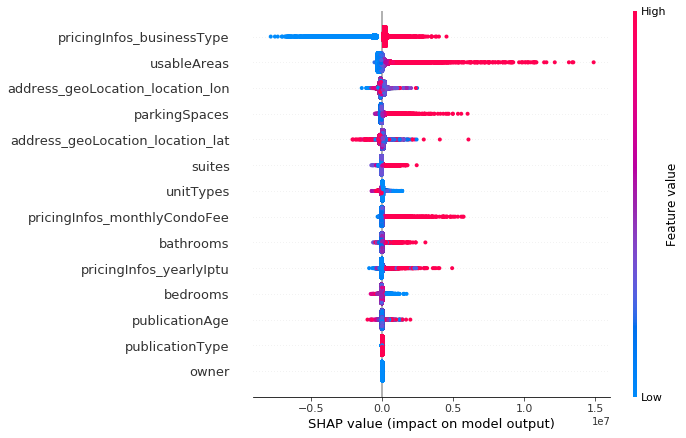

In [55]:
shap.summary_plot(shap_values, X_shap)

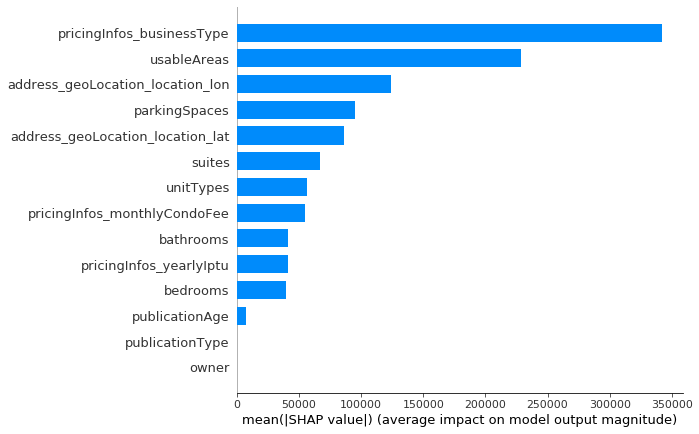

In [56]:
shap.summary_plot(shap_values, X_shap, plot_type='bar')

#### As variáveis correspondentes ao tipo de negócio, área útil e localização (longitude) foram as 3 que mais contribuíram para os valores previstos. Podemos assumir que, caso tivéssemos que escolher apenas 3 variáveis para construir um novo modelo, essas seriam as candidatas ideais.